In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataframes(event_id):
    acorn_event = torch.load(f"../tmp/single_muons/feature_store/valset/{event_id}-graph.pyg")
    acts_graph = pd.read_csv(f"../tmp/single_muons/acts/csv/{event_id}-truth-graph.csv")
    acts_graph = acts_graph.sort_values(["edge0", "edge1"]).drop(columns=["weight"]).reset_index(drop=True)

    acorn_graph = pd.DataFrame()
    acorn_graph["edge0"] = acorn_event.track_edges.numpy()[0]
    acorn_graph["edge1"] = acorn_event.track_edges.numpy()[1]
    acorn_graph = acorn_graph.sort_values(["edge0", "edge1"]).reset_index(drop=True)

    return acorn_graph, acts_graph

def compare(event_id):
    acorn_graph, acts_graph = dataframes(event_id)
    return acorn_graph.equals(acts_graph)

In [3]:
def draw_graphs(event_id):
    acorn_graph, acts_graph = dataframes(event_id)

    acorn_event = torch.load(f"../tmp/single_muons/feature_store/valset/{event_id}-graph.pyg")
    sps = pd.read_csv(f"../tmp/single_muons/acts/csv/{event_id}-spacepoint.csv")
    sps["r"] = np.hypot(sps.x, sps.y)

    fig, ax = plt.subplots(1,2)

    label="acorn"
    for a, b in acorn_graph.to_numpy():
        ax[0].plot([ acorn_event.z[a], acorn_event.z[b] ], [ acorn_event.r[a], acorn_event.r[b] ], "x-", color="tab:blue", label=label, lw=2)
        ax[1].plot([ acorn_event.x[a], acorn_event.x[b] ], [ acorn_event.y[a], acorn_event.y[b] ], "x-", color="tab:blue", label=label, lw=2)
        label=None
    
    label="acts"
    for a, b in acts_graph.to_numpy():
        ax[0].plot([ sps.z[a], sps.z[b] ], [ sps.r[a], sps.r[b] ], ".-", color="tab:orange", label=label)
        ax[1].plot([ sps.x[a], sps.x[b] ], [ sps.y[a], sps.y[b] ], ".-", color="tab:orange", label=label)
        label=None
    
    plt.legend()

In [4]:
for i in range(2,10):
    print("event",i,"equal?",compare(f"event00000000{i}"))

event 2 equal? True
event 3 equal? False
event 4 equal? True
event 5 equal? True
event 6 equal? True
event 7 equal? True
event 8 equal? True
event 9 equal? True


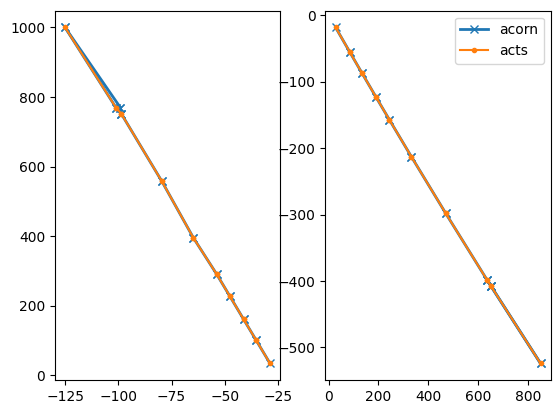

In [5]:
draw_graphs("event000000003")

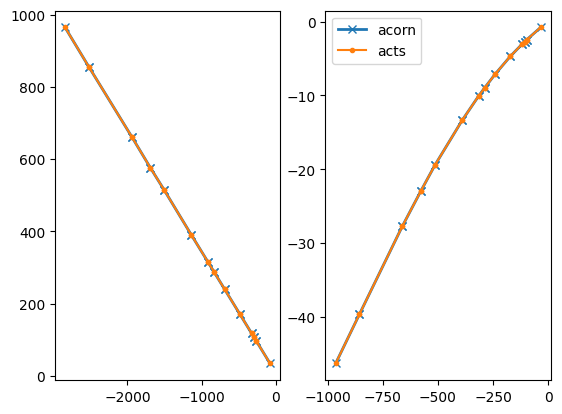

In [6]:
draw_graphs("event000000009")

In [7]:
acorn_graph, acts_graph = dataframes("event000000009")

In [8]:
acorn_graph

,edge0,edge1
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,14
7,7,0
8,8,9
9,9,11


In [9]:
acts_graph

,edge0,edge1
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,14
7,7,0
8,8,9
9,9,11


In [10]:
sps9 = pd.read_csv(f"../tmp/single_muons/acts/csv/event000000009-spacepoint.csv")
sps9["rho"] = np.hypot(sps9.x, sps9.y)
sps9

,measurement_id,geometry_id,x,y,z,var_r,var_z,rho
0,0,20292586602233856,-97.408333,-2.458325,-265.000000,0.005000,3.214942e-34,97.439349
1,1,20294785625489408,-106.800003,-2.724991,-293.000000,0.005000,3.214942e-34,106.834761
2,2,20296984648744960,-117.199997,-3.024991,-324.000000,0.005000,3.214942e-34,117.239029
3,3,27050185066545152,-171.602493,-4.704622,-486.219025,0.001059,1.908385e-04,171.666971
4,4,45071180645793792,-240.183838,-7.114530,-690.571350,0.003596,1.404016e-03,240.289185
5,5,63089977201786880,-287.662567,-8.964964,-832.062988,0.003355,1.644884e-03,287.802229
6,6,63092176225042432,-315.254333,-10.081564,-914.343018,0.000839,4.112374e-04,315.415492
7,7,144977205192032256,-34.197430,-0.791830,-76.685715,0.000000,1.249950e-01,34.206596
8,8,578779622326403072,-513.340149,-19.450186,-1501.285030,5.120000,1.000000e-01,513.708495
9,10,596797319370768384,-576.086975,-22.898869,-1691.285030,5.120000,1.000000e-01,576.541899


In [11]:
evt = torch.load(f"../tmp/single_muons/feature_store/valset/event000000009-graph.pyg")
pd.DataFrame({"x": evt.x, "y": evt.y, "z": evt.z, "rho": evt.r, "r": np.hypot(evt.r, evt.z)})

,x,y,z,rho,r
0,-97.408333,-2.458325,-265.000000,97.439349,282.346289
1,-106.800003,-2.724991,-293.000000,106.834761,311.869630
2,-117.199997,-3.024991,-324.000000,117.239029,344.559124
3,-171.602493,-4.704622,-486.219025,171.666972,515.634065
4,-240.183838,-7.114530,-690.571350,240.289185,731.182386
5,-287.662567,-8.964964,-832.062988,287.802229,880.431110
6,-315.254333,-10.081564,-914.343018,315.415492,967.217704
7,-34.197430,-0.791830,-76.685715,34.206596,83.968983
8,-513.340149,-19.450186,-1501.285034,513.708495,1586.742945
9,-576.086975,-22.898869,-1691.285034,576.541899,1786.853555
